## DATA 620 Final Project
#### Amazon Software Reviews

Benson Toi, Noah Collin, Ahmed Elsaeyed

Data source:
https://nijianmo.github.io/amazon/index.html

This is a sentiment analyisis of Amazon reviews of software from 1998-2015

In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns

In [2]:
print("Pandas version: {}".format(pd.__version__))
#print("datetime version: {}".format(datetime.__version__))
print("Seaborn version: {}".format(sns.__version__))

Pandas version: 1.4.2
Seaborn version: 0.11.2


In [3]:
df = pd.read_json('Software.json',  lines=True) #lines equal true because the CSV has \n chars

In [4]:
df.head(3)

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image
0,4,True,"03 11, 2014",A240ORQ2LF9LUI,0077613252,{'Format:': ' Loose Leaf'},Michelle W,The materials arrived early and were in excell...,Material Great,1394496000,NaN,NaN
1,4,True,"02 23, 2014",A1YCCU0YRLS0FE,0077613252,{'Format:': ' Loose Leaf'},Rosalind White Ames,I am really enjoying this book with the worksh...,Health,1393113600,NaN,NaN
2,1,True,"02 17, 2014",A1BJHRQDYVAY2J,0077613252,{'Format:': ' Loose Leaf'},Allan R. Baker,"IF YOU ARE TAKING THIS CLASS DON""T WASTE YOUR ...",ARE YOU KIDING ME?,1392595200,7,NaN


In [5]:
def HumanTime (x):
    return datetime.utcfromtimestamp(x).strftime('%Y-%m-%d %H:%M:%S')

HumanTime(df['unixReviewTime'][0])

'2014-03-11 00:00:00'

In [16]:
df['ReviewTime']=df.unixReviewTime.apply(HumanTime)
df['ReviewTime'].head(3)


0    2014-03-11 00:00:00
1    2014-02-23 00:00:00
2    2014-02-17 00:00:00
Name: ReviewTime, dtype: object

In [22]:
df['Year'] = df['ReviewTime'].apply(lambda x: int(re.findall ("\d+", x)[0]))
df['Year'].value_counts()

2015    86324
2014    77348
2016    66786
2013    46663
2017    29350
2012    22894
2009    20000
2008    17735
2011    17061
2010    15185
2007    13962
2018    13123
2006     8486
2005     6724
2004     4685
2003     4681
2002     4144
2001     2833
2000     1326
1999      125
1998        1
Name: Year, dtype: int64

In [8]:
df.reviewText.describe()

count     459370
unique    421432
top         good
freq         811
Name: reviewText, dtype: object

In [9]:
df.summary.describe()

count         459380
unique        286888
top       Five Stars
freq           51188
Name: summary, dtype: object

In [10]:
df.overall.value_counts()

5    212452
1    102548
4     73596
3     39395
2     31445
Name: overall, dtype: int64

In [11]:
df.overall.describe() #Review Scores

count    459436.000000
mean          3.570175
std           1.626662
min           1.000000
25%           2.000000
50%           4.000000
75%           5.000000
max           5.000000
Name: overall, dtype: float64

[Text(0.5, 1.0, 'Distribution of reviews for Software'),
 Text(0.5, 0, 'Review Score')]

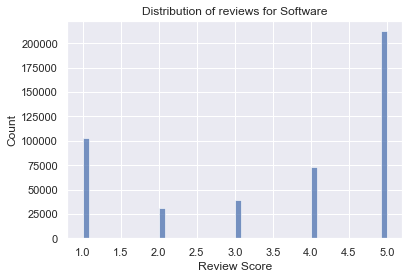

In [12]:
sns.set(style="darkgrid")
sns.histplot(df['overall']).set(title = "Distribution of reviews for Software",
                                        xlabel = 'Review Score')

Mostly five-star reviews.

In [13]:
oneStarReviews = df[df['overall']==1]
oneStarReviews.shape

(102548, 13)

In [14]:
twoStarReviews = df[df['overall']==2]
threeStarReviews = df[df['overall']==3]
fourStarReviews = df[df['overall']==4]
fiveStarReviews = df[df['overall']==5]